# Anisotropía en objetos compactos

## Resolver ecuaciones de campo de Einstein para un objeto estático, simétricamente esférico y anisótropo

### Conociendo $\Delta = P_{\perp} - P$ y $\rho = \rho(r)$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from matplotlib.patches import Polygon

In [2]:
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{amssymb}'})
plt.rcParams.update({'text.usetex': True,'font.serif': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["savefig.bbox"] = 'tight'

In [3]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msol = 1.989*10**(30)      # 1 Masa solar en kilogramos

In [4]:
# Ecuación de equilibrio hidrostático a resolver
def EcEqHid(x,P_,rho_c_til,varkappa,C):
    return -(rho_tilde(x,rho_c_til,varkappa) + P_)*(m_tilde(x,rho_c_til,varkappa) + 4*np.pi*x**(3)*P_)/x/(x - 2*m_tilde(x,rho_c_til,varkappa)) + 2*Delta_tilde(x,rho_c_til,varkappa,C)/x

In [5]:
# Función densidad
def rho_tilde(x,rho_c_til,varkappa):
    return rho_c_til*(1-(1-varkappa)*x**2)

# Función masa
def m_tilde(x,rho_c_til,varkappa):
    return 4*np.pi*rho_c_til*((x**3/3)-(1-varkappa)*(x**5/5))

# Anisotropía Herrera
def Delta_tilde(x,rho_c_til,varkappa,C):
    return C*rho_c_til*(1-varkappa)*(x**2)/5

In [6]:
Lista_C = np.round(np.arange(0.0,3.57,3.57/100),3)
Lista_C = np.append(Lista_C,0.0)
print(*Lista_C, sep=', ')

Lista_rho_c = np.round(np.arange(0.1,2.8,0.3),2)
Lista_rho_c = [i*10**18 for i in Lista_rho_c]
print('Valores de \u03c1_c: ',end='')
print(*Lista_rho_c, sep=', ')

Lista_varkappa = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
print('Valores de \u03f0: ',end='')
print(*Lista_varkappa, sep=', ')

# Número total de modelos evaluados
Numero_de_modelos = len(Lista_C)*len(Lista_rho_c)*len(Lista_varkappa)
print('\nNúmero de modelos: ', Numero_de_modelos)

0.0, 0.036, 0.071, 0.107, 0.143, 0.178, 0.214, 0.25, 0.286, 0.321, 0.357, 0.393, 0.428, 0.464, 0.5, 0.536, 0.571, 0.607, 0.643, 0.678, 0.714, 0.75, 0.785, 0.821, 0.857, 0.892, 0.928, 0.964, 1.0, 1.035, 1.071, 1.107, 1.142, 1.178, 1.214, 1.249, 1.285, 1.321, 1.357, 1.392, 1.428, 1.464, 1.499, 1.535, 1.571, 1.606, 1.642, 1.678, 1.714, 1.749, 1.785, 1.821, 1.856, 1.892, 1.928, 1.963, 1.999, 2.035, 2.071, 2.106, 2.142, 2.178, 2.213, 2.249, 2.285, 2.32, 2.356, 2.392, 2.428, 2.463, 2.499, 2.535, 2.57, 2.606, 2.642, 2.677, 2.713, 2.749, 2.785, 2.82, 2.856, 2.892, 2.927, 2.963, 2.999, 3.034, 3.07, 3.106, 3.142, 3.177, 3.213, 3.249, 3.284, 3.32, 3.356, 3.391, 3.427, 3.463, 3.499, 3.534, 3.57, 0.0
Valores de ρ_c: 1e+17, 4e+17, 7e+17, 1e+18, 1.3e+18, 1.6e+18, 1.9e+18, 2.2000000000000003e+18, 2.5e+18
Valores de ϰ: 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9

Número de modelos:  9180


In [7]:
%%time

Z = []

for i in range(len(Lista_C)):
    
    Z.append([])
    
    C = Lista_C[i]
    
    for j in range(len(Lista_rho_c)):
                
        rho_c = Lista_rho_c[j]
        
        for k in range(len(Lista_varkappa)):
                        
            varkappa = Lista_varkappa[k]
    
            M_odot = 2.08                     # Masa total en unidades de masa solar
            R = (M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3) 
            rho_c_til = G*R**2*rho_c/c**2 
            
            
    
            P0 = 0                 # Condición inicial para Ecuación de equilibrio hidrostático
        
            xmin = 10**-15   
            xmax = 1
            x_span = (xmax,xmin)   # Integración desde el borde (x=1) hacia el centro (x=0)
        
            soluciones = solve_ivp(EcEqHid,x_span,[P0],args=[rho_c_til,varkappa,C],method='RK45',max_step=1/50)
        
            P_til = soluciones.y[0]                                      # Presión radial adimensional
            x = soluciones.t                                             # Radio adimensional
            m_til = m_tilde(x,rho_c_til,varkappa)                        # Masa adimensional
            rho_til = rho_tilde(x,rho_c_til,varkappa)                    # Densidad de energía adimensional
            Delta_til = Delta_tilde(x,rho_c_til,varkappa,C)              # Anisotropía adimensional
            Pt_til = Delta_til + P_til                                   # Presión tangencial adimensional
            gradrho_til = np.gradient(rho_til,x)                         # Derivada de la densidad de energía adimensional
            gradP_til = np.gradient(P_til,x)                             # Derivada de la presión radial adimensional
            gradPt_til = np.gradient(Pt_til,x)                           # Derivada de la presión tangencial adimensional
            vs2 = gradP_til/gradrho_til                                  # Velocidad del sonido radial al cuadrado
            vst2 = gradPt_til/gradrho_til                                # Velocidad del sonido tangencial al cuadrado
            gradgradrho_til = np.gradient(gradrho_til,x)                 # Derivada segunda de la densidad de energía adimensional
            gradvs2 = np.gradient(vs2,x)                                 # Derivada de la velocidad del sonido radial al cuadrado
            var_rho_c = np.linspace(0.5*10**18,2.5*10**18,11)    
            var_rho_c_til = G*R**2*var_rho_c/c**2    
            var_M_til = 4*np.pi*var_rho_c_til*(1/3 - (1-varkappa)/5)     # M tilde en función de rho central tilde
        
            var_til = [rho_til,P_til,m_til]
        
            ## Condición 1
            C1 = 2*m_til/x
            if any(C1 >= 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 2
            C2A = rho_til
            C2B = P_til
            C2C = Pt_til
            C2 = [C2A,C2B,C2C]
            if any(C2[0] < 0) or any(C2[1] < 0) or any(C2[2] < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 3
            C3A = gradrho_til
            C3B = gradP_til
            C3C = gradPt_til
            C3 = [C3A,C3B,C3C]
            if any(C3[0] > 0) or any (C3[1] > 0) or any (C3[2] > 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 4
            C4 = rho_til - P_til - 2*Pt_til
            if any(C4 < 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 5
            C5A = vs2             
            C5B = vst2   
            C5 = [C5A,C5B]
            if any(C5[0] > 1) or any(C5[1] > 1): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 6
            C6 = ((rho_til[1:] + P_til[1:])*vs2[1:]/P_til[1:])
            if any(C6 < 4/3): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 7
            C7 = var_M_til
        
            ## Condición 8
            C8rho = (m_til + 4*np.pi*x**3*P_til)/x/(x - 2*m_til)
            C8P = ((m_til + 4*np.pi*x**3*(rho_til + 2*P_til))/x/(x - 2*m_til) + 2/x)*vs2
            C8Pt = -(2/x)*vst2
            C8m = ((rho_til + P_til)*(1 + 8*np.pi*x**2*P_til)/(x - 2*m_til)**2)*(4*np.pi*x**2*rho_til/gradrho_til)
            C8dP = gradvs2 + vs2*gradgradrho_til/gradrho_til
            C8T = C8rho+C8P+C8Pt+C8m+C8dP
        
            C8 = [C8T,C8rho,C8P,C8Pt,C8m,C8dP]
            if any(np.diff(np.sign(C8[0][2:-1])) != 0): 
                Z[i].append(int(0))
                continue
            else: pass
        
            ## Condición 9
            C9 = gradgradrho_til
            
            Z[i].append(int(9))
            
            
            
    Z[i] = np.flipud(np.array(Z[i]).reshape(len(Lista_rho_c),len(Lista_varkappa)).T)
    
    print(len(np.where(Z[i] == 9)[0]),C)


33 0.0
28 0.036
24 0.071
21 0.107
20 0.143
19 0.178
18 0.214
16 0.25
15 0.286
15 0.321
13 0.357
15 0.393
14 0.428
15 0.464
14 0.5
13 0.536
13 0.571
11 0.607
11 0.643
10 0.678
10 0.714
10 0.75
10 0.785
9 0.821
9 0.857
9 0.892
10 0.928
7 0.964
7 1.0
7 1.035
7 1.071
6 1.107
6 1.142
7 1.178
6 1.214
6 1.249
6 1.285
6 1.321
5 1.357
5 1.392
6 1.428
6 1.464
5 1.499
5 1.535
4 1.571
4 1.606
4 1.642
4 1.678
5 1.714
5 1.749
5 1.785
4 1.821
5 1.856
5 1.892
6 1.928
5 1.963
4 1.999
4 2.035
4 2.071
4 2.106
4 2.142
3 2.178
2 2.213
2 2.249
2 2.285
2 2.32
2 2.356
2 2.392
2 2.428
3 2.463
2 2.499
3 2.535
2 2.57
2 2.606
2 2.642
2 2.677
2 2.713
1 2.749
2 2.785
2 2.82
2 2.856
2 2.892
2 2.927
2 2.963
3 2.999
2 3.034
1 3.07
1 3.106
1 3.142
1 3.177
1 3.213
2 3.249
2 3.284
2 3.32
2 3.356
2 3.391
1 3.427
1 3.463
1 3.499
1 3.534
0 3.57
33 0.0
Wall time: 3min 9s


In [8]:
Otros = []

#C_comp_ind = np.where(Lista_C == 0.22)[0][0]
C_comp_ind = -1

def Rkm(rho_c,varkappa):
    return np.round(((M_odot*Msol/4/np.pi/rho_c/(1/3 - (1-varkappa)/5))**(1/3))/1000,2)

def Compacidad(rho_c,varkappa):
    return np.round(2*4*np.pi*(G*(Rkm(rho_c,varkappa)*1000)**2*rho_c/c**2)*((1/3)-(1-varkappa)*(1/5)),2)

for i in range(len(Lista_C)):
    
    Otros.append([])
    
    if np.any(Z[C_comp_ind]-Z[i] < 0):
        
        for j in range(len(np.where(Z[C_comp_ind]-Z[i] < 0)[0])):
            
            Otros[i].append((Lista_C[i],Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]]/1000,
                             np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]],
                            Rkm(Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]],
                               np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]]),
                            Compacidad(Lista_rho_c[np.where(Z[C_comp_ind]-Z[i] < 0)[1][j]],
                                      np.flipud(Lista_varkappa)[np.where(Z[C_comp_ind]-Z[i] < 0)[0][j]])))
    
    else: pass
    
Otros = [i for j in Otros for i in j]

Otros

[(0.036, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.071, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.107, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.143, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.143, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.178, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.178, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.178, 1600000000000000.0, 0.2, 10.59, 0.58),
 (0.214, 100000000000000.0, 0.9, 21.9, 0.28),
 (0.214, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.214, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.214, 1600000000000000.0, 0.2, 10.59, 0.58),
 (0.25, 100000000000000.0, 0.9, 21.9, 0.28),
 (0.25, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.25, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.286, 100000000000000.0, 0.9, 21.9, 0.28),
 (0.286, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.286, 1300000000000000.0, 0.3, 10.94, 0.56),
 (0.286, 1600000000000000.0, 0.3, 10.21, 0.6),
 (0.321, 100000000000000.0, 0.9, 21.9, 0.28),
 (0.321, 1300000000000000.0, 0.4, 10.59, 0.58),
 (0.

In [9]:
DatosTabla = []

for i in range(len(np.where(Z[C_comp_ind] == 9)[0])):
    
    DatosTabla.append([Lista_C[C_comp_ind],Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]]/1000,
                      Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]],
                       Rkm(Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]],
                           Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]]),
                      Compacidad(Lista_rho_c[np.where(np.flipud(Z[C_comp_ind]).T == 9)[0][i]],
                                Lista_varkappa[np.where(np.flipud(Z[C_comp_ind]).T == 9)[1][i]])])  
    
    if DatosTabla[i][3] <= 13.1 and DatosTabla[i][3] >= 11.6:
        
        DatosTabla[i].append('A')
    
    else: pass
    
    
for j in range(len(Otros)): DatosTabla.append(Otros[j])

In [10]:
DatosTabla

[[0.0, 100000000000000.0, 0.0, 29.12, 0.21],
 [0.0, 100000000000000.0, 0.1, 27.79, 0.22],
 [0.0, 100000000000000.0, 0.2, 26.68, 0.23],
 [0.0, 100000000000000.0, 0.3, 25.73, 0.24],
 [0.0, 100000000000000.0, 0.4, 24.9, 0.25],
 [0.0, 100000000000000.0, 0.5, 24.16, 0.25],
 [0.0, 100000000000000.0, 0.6, 23.51, 0.26],
 [0.0, 100000000000000.0, 0.7, 22.92, 0.27],
 [0.0, 100000000000000.0, 0.8, 22.39, 0.27],
 [0.0, 400000000000000.0, 0.0, 18.34, 0.33],
 [0.0, 400000000000000.0, 0.1, 17.51, 0.35],
 [0.0, 400000000000000.0, 0.2, 16.81, 0.37],
 [0.0, 400000000000000.0, 0.3, 16.21, 0.38],
 [0.0, 400000000000000.0, 0.4, 15.68, 0.39],
 [0.0, 400000000000000.0, 0.5, 15.22, 0.4],
 [0.0, 400000000000000.0, 0.6, 14.81, 0.42],
 [0.0, 400000000000000.0, 0.7, 14.44, 0.43],
 [0.0, 700000000000000.0, 0.0, 15.22, 0.4],
 [0.0, 700000000000000.0, 0.1, 14.53, 0.42],
 [0.0, 700000000000000.0, 0.2, 13.95, 0.44],
 [0.0, 700000000000000.0, 0.3, 13.45, 0.46],
 [0.0, 700000000000000.0, 0.4, 13.01, 0.47, 'A'],
 [0.0, 7

In [11]:
A = [i for j in DatosTabla for i in j].count('A')
print('Número de modelos con Radio observado:',A)

Número de modelos con Radio observado: 8


In [12]:
C = Lista_C[C_comp_ind]

L_rho_c = np.round(np.arange(0.1,2.575,0.075),3)
L_rho_c = [i*10**18 for i in L_rho_c]
print('Valores de \u03c1_c: ',end='')
print(*L_rho_c, sep=', ')

L_varkappa = np.round(np.arange(0,0.925,0.025),3)
print('Valores de \u03f0: ',end='')
print(*L_varkappa, sep=', ')

rho_c = L_rho_c
varkappa = L_varkappa

X,Y = np.meshgrid(rho_c,varkappa)
Z_R = Rkm(X,Y)

Valores de ρ_c: 1e+17, 1.75e+17, 2.5e+17, 3.25e+17, 4e+17, 4.75e+17, 5.5000000000000006e+17, 6.25e+17, 7e+17, 7.75e+17, 8.5e+17, 9.25e+17, 1e+18, 1.075e+18, 1.1499999999999999e+18, 1.225e+18, 1.3e+18, 1.375e+18, 1.45e+18, 1.525e+18, 1.6e+18, 1.675e+18, 1.75e+18, 1.825e+18, 1.9e+18, 1.975e+18, 2.0499999999999997e+18, 2.125e+18, 2.2000000000000003e+18, 2.275e+18, 2.35e+18, 2.425e+18, 2.5e+18
Valores de ϰ: 0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9


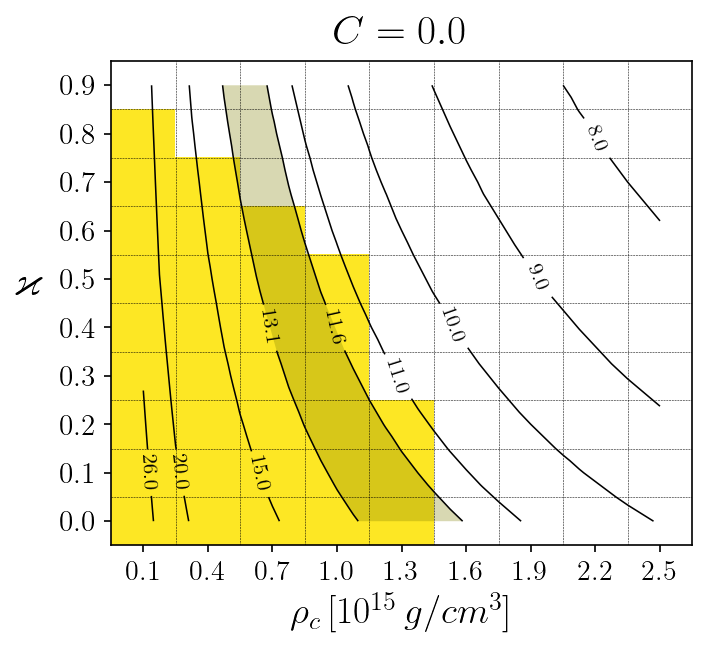

In [13]:
zim = np.flipud(Z[C_comp_ind])
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5,8))
cs = ax1.contour(X/10**18,Y,Z_R,levels=[8,9,10,11,11.6,13.1,15,20,26],colors='black',linewidths=0.75)
manual_locations = [(2.3,0.8),(1.9,0.5),(1.5,0.4),(1.3,0.3),(1.0,0.4),(0.7,0.4),(0.7,0.1),(0.25,0.1),(0.1,0.1)]
ax1.clabel(cs,inline=True,fontsize=10,inline_spacing=30,manual=manual_locations)
cmap = matplotlib.cm.get_cmap('viridis').copy()
cmap.set_under(color='white')
im = plt.imshow(zim,aspect=2.25,cmap=cmap,origin='lower',extent=[-0.05,2.65,-0.05,0.95],vmin=4,vmax=9)
ax1.set_xlabel(r'$\rho_{c}\,[10^{15}\,g/cm^{3}]$',fontsize=18)
ax1.set_ylabel(r'$\varkappa$',fontsize=20,rotation=0,labelpad=15)
ax1.set_title(r'$C = 0.0$',fontsize=20,x=0.5,y=1.01)
ax1.set_xticks([0.1,0.4,0.7,1.0,1.3,1.6,1.9,2.2,2.5])
ax1.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) 
ax1.set_xticks([0.25,0.55,0.85,1.15,1.45,1.75,2.05,2.35],minor=True)
ax1.set_yticks([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85],minor=True)  
ax1.grid(which='minor',color='black',linestyle='dashed',linewidth=0.25)
ax1.tick_params(which='minor',bottom=False,left=False)
plt.xticks(fontsize=13.5),plt.yticks(fontsize=14)

path0 = np.concatenate((cs.collections[4].get_paths()[0].vertices,cs.collections[4].get_paths()[1].vertices))
path1 = np.flipud(np.concatenate((cs.collections[5].get_paths()[0].vertices,cs.collections[5].get_paths()[1].vertices)))
poly = Polygon(np.concatenate((path0,path1)),fc='olive',ec='None',alpha=0.3)
ax1.add_patch(poly)


plt.show()